#  Self Study 3

In this self study we perform character recognition using SVM classifiers. We use the MNIST dataset, which consists of 70000 handwritten digits 0..9 at a resolution of 28x28 pixels. 

Stuff we need:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
#from sklearn.datasets import fetch

Now we get the MNIST data. Using the fetch_mldata function, this will be downloaded from the web, and stored in the directory you specify as data_home (replace my path in the following cell):

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784', data_home='./data')

The data has .data and .target attributes. The following gives us some basic information on the data:

In [3]:
print("Number of datapoints: {}\n".format(mnist.data.shape[0]))
print("Number of features: {}\n".format(mnist.data.shape[1]))
print("List of labels: {}\n".format(np.unique(mnist.target)))

Number of datapoints: 70000

Number of features: 784

List of labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']



The mnist.data is represented as a Pandas dataframe (probably -- you may check this via type(mnist.data)). The following code expects mnist.data to be a plain np.array, which we get simply by running:

In [4]:
mnist.data=np.array(mnist.data)
type(mnist.data)

numpy.ndarray

We can plot individual datapoints as follows:

As image:



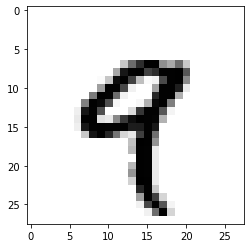

In [5]:
index = 4
#print("Value of datapoint no. {}:\n{}\n".format(index,mnist.data[index]))
print("As image:\n")
plt.imshow(mnist.data[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

To make things a little bit simpler (and faster!), we can extract from the data binary subsets, that only contain the data for two selected digits:

The first datapoint now is: 



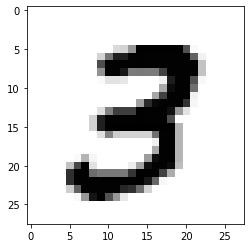

7        3
10       3
12       3
15       7
27       3
        ..
69975    3
69979    7
69986    3
69990    7
69996    3
Name: class, Length: 14434, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [6]:
digit0='3'
digit1='7'
mnist_bin_data=mnist.data[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
mnist_bin_target=mnist.target[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
print("The first datapoint now is: \n")
plt.imshow(mnist_bin_data[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()
print(mnist_bin_target)

**Exercise 1 [SVM]:** Split the mnist_bin data into training and test set. Learn different SVM models by varying the kernel functions (SVM). For each configuration, determine the time it takes to learn the model, and the accuracy on the test data. 

You can get the current time using:

`import time` <br>
`now = time.time()`

*Caution*: for some configurations, learning here can take a little while (several minutes).

Using the numpy where() function, one can extract the indices of the test cases that were misclassified: <br>
`misclass = np.where(test != predictions)` <br>
Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? 

How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full classification of the 10 classes in the original dataset (after split into train/test). Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels. What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

In [7]:
# Training and testing on binary classification task first
X_train, X_test, y_train, y_test = train_test_split(mnist_bin_data, mnist_bin_target, 
                                                    test_size=.30, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape                                                    

((10103, 784), (4331, 784), (10103,), (4331,))

In [8]:
# Linear Kernel / binary 3 and 7
model = SVC(kernel='linear')
now = time.time()
model.fit(X_train, y_train)
end = time.time()
print(f'Linear Kernel')
print(f'Duration elapsed {(end - now):.2f} seconds')
print(f'Accuracy on training set: {model.score(X_train, y_train):.2f}')
print(f'Accuracy on test set: {model.score(X_test, y_test):.2f}')

Linear Kernel
Duration elapsed 2.61 seconds
Accuracy on training set: 1.00
Accuracy on test set: 0.98


In [11]:
# Poly Kernel / binary 3 and 7
model = SVC(kernel='poly')
now = time.time()
model.fit(X_train, y_train)
end = time.time()
print('Polynomial Kernel')
print(f'Duration elapsed {(end - now):.2f} seconds')
print(f'Accuracy on training set: {model.score(X_train, y_train):.2f}')
print(f'Accuracy on test set: {model.score(X_test, y_test):.2f}')

Polynomial Kernel
Duration elapsed 2.94 seconds
Accuracy on training set: 1.00
Accuracy on test set: 0.99


In [12]:
# Gaussian Kernel / binary 3 and 7
model = SVC(kernel='rbf')
now = time.time()
model.fit(X_train, y_train)
end = time.time()
print('Gaussian Kernel')
print(f'Duration elapsed {(end - now):.2f} seconds')
print(f'Accuracy on training set: {model.score(X_train, y_train):.2f}')
print(f'Accuracy on test set: {model.score(X_test, y_test):.2f}')

Gaussian Kernel
Duration elapsed 2.62 seconds
Accuracy on training set: 1.00
Accuracy on test set: 0.99


In [13]:
# Tanh/Sigmoid Kernel / binary 3 and 7
model = SVC(kernel='sigmoid')
now = time.time()
model.fit(X_train, y_train)
end = time.time()
print('Tanh/Sigmoid Kernel')
print(f'Duration elapsed {(end - now):.2f} seconds')
print(f'Accuracy on training set: {model.score(X_train, y_train):.2f}')
print(f'Accuracy on test set: {model.score(X_test, y_test):.2f}')

Tanh/Sigmoid Kernel
Duration elapsed 4.52 seconds
Accuracy on training set: 0.95
Accuracy on test set: 0.96


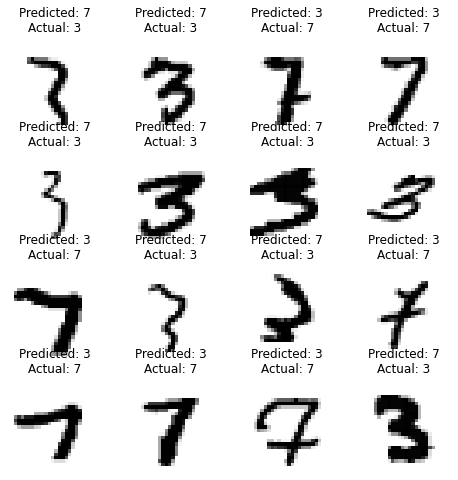

In [14]:
misclass = np.where(y_test != model.predict(X_test))[0]
misclass.shape
# plot misclassified in 4 by 4 grid with 16 images with class labels
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i, idx in enumerate(misclass[:16]):
    ax[i // 4, i % 4].imshow(X_test[idx].reshape(28, 28), cmap=plt.cm.gray_r)
    ax[i // 4, i % 4].set_title(f'Predicted: {model.predict(X_test[idx].reshape(1, -1))[0]}\nActual: {y_test.iloc[idx]}')
    ax[i // 4, i % 4].axis('off')

### Evaluating binary classification for 3 and 7
- all take around same time
- all get similarly good accuracy

In [15]:
# Testing on all classes
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target)

In [16]:
model = SVC(kernel='rbf')
now = time.time()
model.fit(X_train, y_train)
end = time.time()
print('Gaussian Kernel')
print(f'Duration elapsed {(end - now):.2f} seconds')
print(f'Accuracy on training set: {model.score(X_train, y_train):.2f}')
print(f'Accuracy on test set: {model.score(X_test, y_test):.2f}')

Gaussian Kernel
Duration elapsed 143.42 seconds
Accuracy on training set: 0.99
Accuracy on test set: 0.98


In [17]:
print("Gaussian Confusion Matrix: \n")
print(f'Confusion matrix: \n{confusion_matrix(y_test, model.predict(X_test))}')

Gaussian Confusion Matrix: 

Confusion matrix: 
[[1730    1    3    0    0    1    4    0    2    1]
 [   0 1929    9    2    2    1    1    5    3    1]
 [   4    6 1758    5    4    0    2    7   10    1]
 [   2    3   18 1714    1   10    0    8    9    2]
 [   4    3    6    0 1613    0    6    2    1   14]
 [   1    2    4   11    4 1533   12    0    3    4]
 [   7    4    2    0    3    3 1757    0    4    0]
 [   1    7   10    3    7    0    0 1741    1   14]
 [   0    5    2    9    3   12    6    4 1678    2]
 [   3    3    1   11   15    5    1   14   11 1669]]


### Evaluating for full data set with all classes
- It takes more time to train with all class, but it takes significantly longer for inference afterwards
- similarly not to much performance divergence

**Exercise 2 [SVM]:** Consider how the current data representation "presents" the digits to the classifiers, and try to improve this:<br>

**a)** Manually design feature functions for which you expect that based on your new features SVM classifiers can achieve a better accuracy than with the original features. Transform the data into your new feature space, and learn new classifiers. What accuracies do you get?

**b)** Instead of designing an explicit feature mapping as in **a)**, define a suitable measure of similarity for the digits, and implement that measure as a kernel function. (Optional: verify that the function you have defined actually satisfies the positive-semidefiniteness property.) Use your kernel function as a custom kernel for the SVC classifier.  See http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py for an example.

### Part a)

In [18]:
# Will manually make some convolution kernels
k1 = np.ones((3,3))
k2 = np.eye(3)
k3 = np.array([[0,0,1],
               [0,1,0],
               [1,0,0]])
k4 = np.array([[0,1,0],
               [0,1,0],
               [0,1,0]])
k5 = np.array([[0,0,0],
               [1,1,1],
               [0,0,0]])
k6 = np.random.rand(3,3)
k7 = np.random.rand(3,3)

In [19]:
def convolve(image, kernel):
    # image is a 2D numpy array
    # kernel is a 2D numpy array
    # output is a 2D numpy array
    # output is the same size as image
    output = np.zeros(image.shape) 
    for i in range(image.shape[0]-kernel.shape[0]+1):
        for j in range(image.shape[1]-  kernel.shape[1]+1):
            output[i,j] = np.sum(image[i:i+kernel.shape[0], j:j+kernel.shape[1]] * kernel)
    return output

def max_pool(image, k_shape, stride):
    # image is a 2D numpy array
    # kernel is a 2D numpy array
    # output is a 2D numpy array
    # output is image[0] // stride x image[1] // stride
    kernel = np.ones(k_shape)
    output = np.zeros((image.shape[0]//stride, image.shape[1]//stride))
    for i in range(0, image.shape[0]//stride, stride):
        for j in range(0, image.shape[1]//stride, stride):
            output[i,j] = np.max(image[i*stride:i*stride+kernel.shape[0], j*stride:j*stride+kernel.shape[1]])
    return output

In [20]:
def feature_map(image, kernels):
    output = []
    for kernel in kernels:
        x = convolve(image, kernel)
        x = max_pool(x, (2,2), 2)
        x = convolve(x, kernel)
        x = max_pool(x, (2,2), 2)
        output.append(x)
    for i, map in enumerate(output):
        output[i] = map.flatten()
    
    return np.concatenate(output, axis=0)

In [21]:
import tqdm as tqdm
kernels = [k1, k2, k3, k4, k5, k6, k7]
# Testing on binary 3 and 7
X_train, X_test, y_train, y_test = train_test_split(mnist_bin_data, mnist_bin_target, test_size=.30, random_state=0)
# transform into manual feature map
X_train_map, X_test_map = [], []
for i in tqdm.tqdm(range(X_train.shape[0]), desc='Training', unit='mapped images'):
    X_train_map.append(feature_map(X_train[i].reshape(28,28), kernels))
for i in tqdm.tqdm(range(X_test.shape[0]), desc='Test', unit='mapped images'):
    X_test_map.append(feature_map(X_test[i].reshape(28,28), kernels))

Test: 100%|██████████| 4331/4331 [02:46<00:00, 26.03mapped images/s]


In [22]:
model = SVC(kernel='rbf')
now = time.time()
model.fit(X_train_map, y_train)
end = time.time()
print('Gaussian Kernel')
print(f'Duration elapsed {(end - now):.2f} seconds')
print(f'Accuracy on training set: {model.score(X_train_map, y_train):.2f}')
print(f'Accuracy on test set: {model.score(X_test_map, y_test):.2f}')
print(f'Confusion matrix: \n{confusion_matrix(y_test, model.predict(X_test_map))}')

Gaussian Kernel
Duration elapsed 2.07 seconds
Accuracy on training set: 0.98
Accuracy on test set: 0.98
Confusion matrix: 
[[2090   56]
 [  17 2168]]


In [23]:
# Testing binary 3 and 7 - simple sum feature map
X_train, X_test, y_train, y_test = train_test_split(mnist_bin_data, mnist_bin_target, test_size=.30, random_state=0)
X_train_sum, X_test_sum = np.sum(X_train, axis=1).reshape(-1, 1), np.sum(X_test, axis=1).reshape(-1, 1)
X_train_sum.shape, X_test_sum.shape

((10103, 1), (4331, 1))

In [24]:
model = SVC(kernel='rbf')
now = time.time()
model.fit(X_train_sum, y_train)
end = time.time()
print('Gaussian Kernel')
print(f'Duration elapsed {(end - now):.2f} seconds')
print(f'Accuracy on training set: {model.score(X_train_sum, y_train):.2f}')
print(f'Accuracy on test set: {model.score(X_test_sum, y_test):.2f}')
print(f'Confusion matrix: \n{confusion_matrix(y_test, model.predict(X_test_sum))}')

Gaussian Kernel
Duration elapsed 3.81 seconds
Accuracy on training set: 0.66
Accuracy on test set: 0.66
Confusion matrix: 
[[1249  897]
 [ 575 1610]]


### Part b)

In [26]:
#create costum SVC kernel test for binary 3 and 7
def custom_kernel(X, Y):
    print(X.shape, Y.shape)
    print(np.dot(X, Y.T).shape)
    return np.dot(X, Y.T)

def overlap_kernel(X, Y):
    (X == Y).sum(axis=1) 
    return np.dot(X, Y.T)

model = SVC(kernel=custom_kernel)
now = time.time()
model.fit(X_train, y_train)
end = time.time()

print("Time taken to train: {}".format(end-now))
print("Train accuracy: {}".format(model.score(X_train, y_train)))
print("Test accuracy: {}".format(model.score(X_test, y_test)))

(10103, 784) (10103, 784)
(10103, 10103)
Time taken to train: 2.6208877563476562
(10103, 784) (10103, 784)
(10103, 10103)
Train accuracy: 1.0
(4331, 784) (10103, 784)
(4331, 10103)
Test accuracy: 0.979450473331794
